# 4 - Influential Classification Models (and Tools)

## Introduction

This project will dive into more advanced developments of Convolutional Neural Networks (CNNs) that has become famous for their contributions to computer visions. The notebook will also explore methods that better prepare the CNNs to perform on specific tasks, such as the use of Transfer Learning whereby previous knowledge (trained weights) of a network on a specific use case can be transferred/re-developed for new applications. 

## Breakdown of this Project:
- Advance architectures of CNN like, VGG, Inception and ResNet.
- Implementations of these advance network for classification tasks.
- Transfer Learning for efficient repurposing of trained networks.

## Requirements:
- Tensorflow 2.0 (GPU is better)
- Tensorflow-Hub
- Keras (GPU is better)

### Import the required libraries:

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import timeit

In [2]:
import os
from IPython.display import display, Image
import matplotlib.pyplot as plt

# %matplotlib inline

# Set up the working directory for the images:
image_folderName = 'Description Images'
image_path = os.path.abspath(image_folderName) + '/'

In [3]:
# Set the random set seed number: for reproducibility.
Seed_nb = 42

### GPU Information:

In [4]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
devices = sess.list_devices()
devices

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:09:00.0, compute capability: 7.5



[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 13089833427544560197),
 _DeviceAttributes(/job:localhost/replica:0/task:0/device:GPU:0, GPU, 6588305899, 6839411382907407118)]

## 1 - Advanced CNN Architectures:

Advancements in recent years have pushed the capabilities of CNNs, winning models have been featured in contest such as the __ImageNet Large Scale Visual Recognition Challenge (ILSVRC)__. This contest consists of millions of images that are split up into __1,000__ classes and still represent a great challenge for researchers. In 2012, AlexNet had won the competeition. This section will then go through methods or architectures, and the model's contributions that were developed after the winning AlexNet. 

## 1.1 - Contributions from AlexNet:

AlexNet was known to be the first CNN that had successfully trained on the complex ILSVRC dataset for image recognition. The implementations of AlexNet lead to several contributions that are highly useful for CNNs. These contributions includes:

- Use of Rectified Linear Unit (ReLU) as an activation function. This had solved the vanishing gradient problem therefore improving the training process.
- The use of Dropout for CNNs. Essentially, it amounts to sampling a thinned-out network and is used as a regularisation technique.
- Application of different types of transformations to augment the dataset. These techniques can be image translation, horizontal fliipping, or cropping etc.
- Solidifying the typical archittecture of a CNN, such as combining convolutions with pooling layers and with the use of dense layers in latter stages for the final prediction.

The following will continue discussing the more advanced networks.

### List of Advanced Networks:
1) VGG, Visual Geometry Group. \
2) Inception. \
3) ResNet.

## 1.2 - VGG Architecture:

The VGG network was developed by the Visual Geometry Group at Oxford University. Thiis network was able to achieve 2nd place during the ILSVRC of 2014. This section will go through the architecture of VGG and how it was able to obtain a higher accuracy score while training on fewer parameters. The main motivatiion for VGG was to try and __go deeper__ as a network where it consists of building such a network with a larger number of stacked layers. The drawback from doing it this way is that the number of parameters also increased. This meant that it will take longer to train the model. When VGG was submitted into ILSVRC of 2014, they achieved the top-5 error of 7.3%, performing better than AlexNet which got a 16.4% error. 

NOTE: __Top-5 Accuracy__ is one of the main classification metrics of the contest, where it considers if the correct class prediction is amongst the five first guesses. 

#### The diagram below shows the overall architecures of VGG:

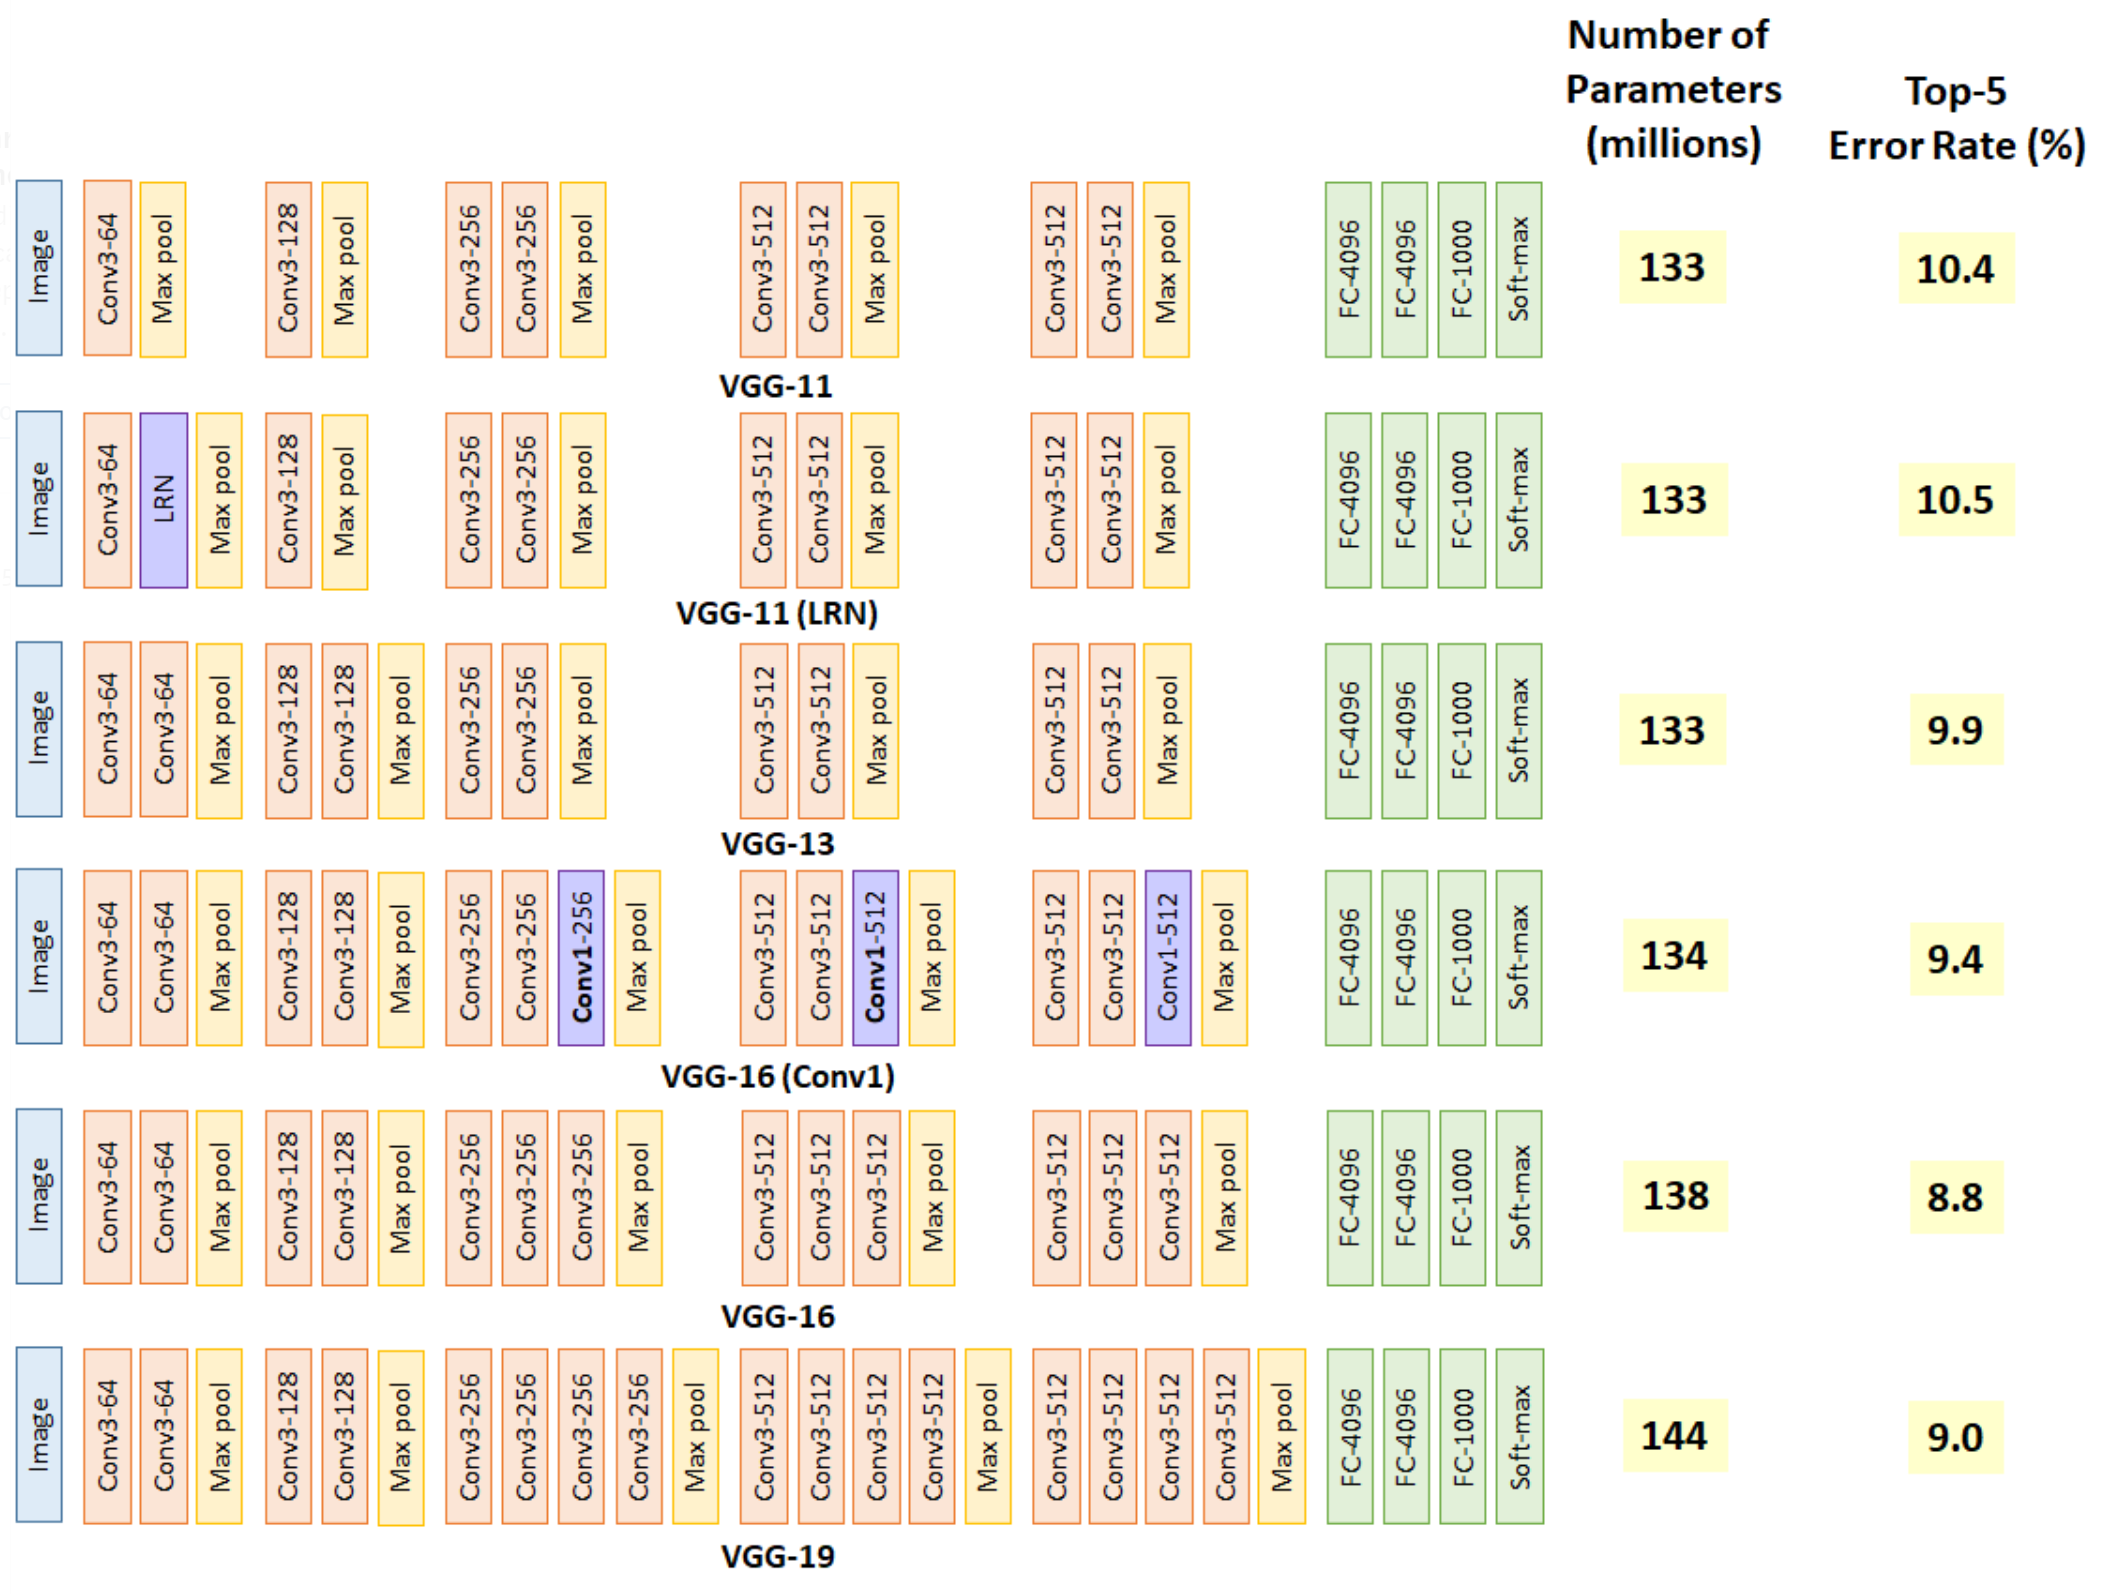

Image ref -> https://towardsdatascience.com/cnn-architectures-a-deep-dive-a99441d18049


In [5]:
# VGG16 Architecture: 
display(Image(image_path + 'VGG_all.PNG', width=800, unconfined=True))
print('Image ref -> https://towardsdatascience.com/cnn-architectures-a-deep-dive-a99441d18049')

VGG instroduced a model with 6 different CNN architecures that ranges from 11 layers to 25 layers deep. Each of the network consists of 5 blocks of consecutive convolutions paired with a max-pooling layer. The models then finishes it will 3 final dense layers without dropout for traininig. All the convolutional and max-pooling layers are set with a padding to have the "SAME" output size as teh input size. The convolutions will also have a stride of 1 (s = 1) and activated with the ReLU function. 

#### Below shows the VGG-16 model in more detail:

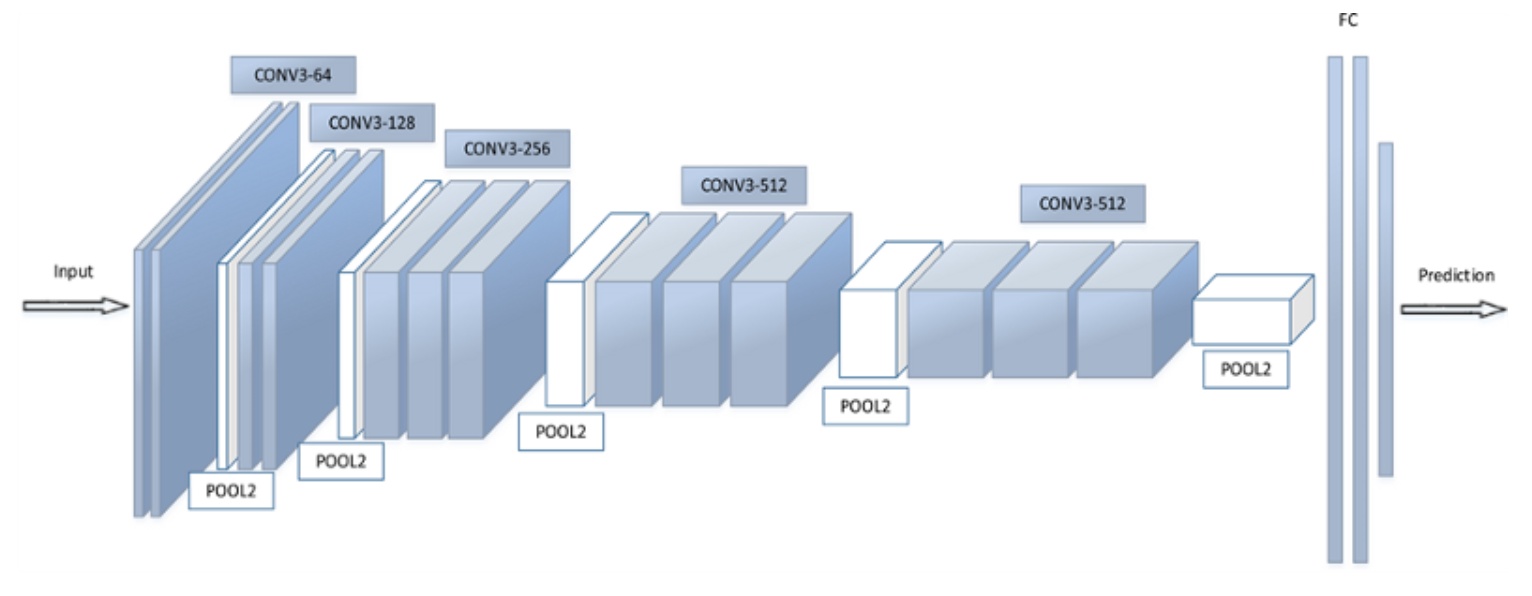

Image ref -> https://www.kaggle.com/shivamb/cnn-architectures-vgg-resnet-inception-tl


In [6]:
# VGG16 Architecture: 
display(Image(image_path + 'VGG16 Architecture.PNG', width=800, unconfined=True))
print('Image ref -> https://www.kaggle.com/shivamb/cnn-architectures-vgg-resnet-inception-tl')

#### Below shows the VGG-16 beside VGG-19 model in more detail:

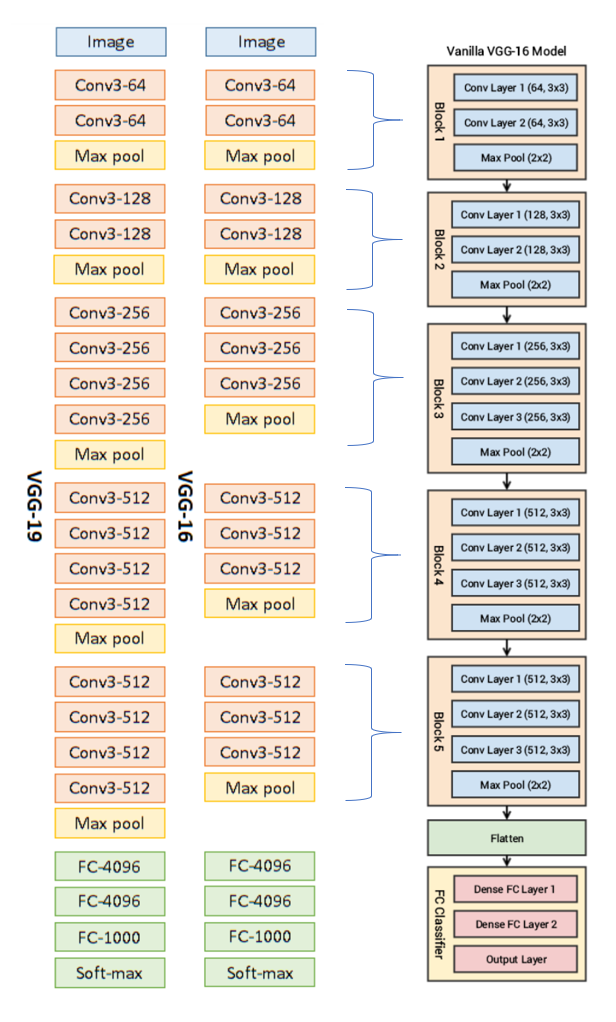

Image ref -> https://hub.packtpub.com/how-to-leverage-transfer-learning-using-pretrained-cnn-models-tutorial/
Image ref -> https://towardsdatascience.com/cnn-architectures-a-deep-dive-a99441d18049


In [7]:
# VGG-16 and 19 Architectures: wiiht VGG-16 in more detail.
display(Image(image_path + 'VGG16 and 19 combine.PNG', width=600, unconfined=True))
print('Image ref -> https://hub.packtpub.com/how-to-leverage-transfer-learning-using-pretrained-cnn-models-tutorial/')
print('Image ref -> https://towardsdatascience.com/cnn-architectures-a-deep-dive-a99441d18049')

Overall, the VGG-16 and VGG-19 models are considered to be the most performant architectures, where the number 16 and 19 means the depth (how deep the layers goes) of these architectures or the number of trainable layers that were stacked together. __VGG-16__ has a total of 138 million parameters to train for, and consists of 13 convolutional layers paired with 3 dense layers that totals to 16 layers. These arenot inclusive of the 5 max-pooling layers or the 2 dropout layers. Similar can be said for __VGG-19__, where it has 144 million parameters to train for and consists of three more convolutional layers.

## 1.2.1 - Contributions that were introduced by VGG creators:

List of contributions:
1) Substituting larger convolutions with multiple smaller ones. \
2) Increased depth of the feature maps. \
3) Data augmentation and Scale jittering. \
4) Replacement of the fully connnected layers with convolutional ones.

### 1.2.1.1 - Substituting larger convolutions with multiple smaller ones:

It was found through observations by VGG creators that a stack of two 3x3 kernels has the same receptive field as 5x5 kernels. Similarly, a stack of three 3x3 convolutional kernels has the same receptive field as a 7x7 kernel, or a stack of five 3x3 convolutional kernal has the same receptive field as 11x11 kernels. The changes that was implement in VGG networks were swapping for several smaller convolutions to obtain a __larger effective receptive field__. 

The advantages of doing so are:
- It decreases the number of parameters.
- It increases the non-linearity, allowing the network to learn more complex features. 

This essentially allows the model to effectively go deeper. 

### 1.2.1.2 - Increased depth of the feature maps:

The creators also increase the depth of the feature maps by doubling its count for each of the convolutional blocks. This can be seen from the 1st block at 64 to the last blockat 512. For each block, a max-pooling layer with a 2x2 window size and a stride of 2 was also added. This essentially means that the depth was doubled while the spatial dimensions were halved, leading to __more complex and discriminative features__. 

### 1.2.1.3 - Data augmentation and Scale jittering:

Scale jittering is a method where the batched images are randomly scaled, for example from 256 pixels to 512 pixels, and then cropped into the desired input size (like 224x224 pixels). This means that the network will have the opportunity to learn from samples of different scales and be able to classify them. The resulting model would be more robust from training on a larger range of images. Data Augmentation is a method where the dataset would be synthetically increased in size, it includes random transformations, cropping and flipping to create different versions of the same image.

#### The following shows an image that has been augmented in different ways:

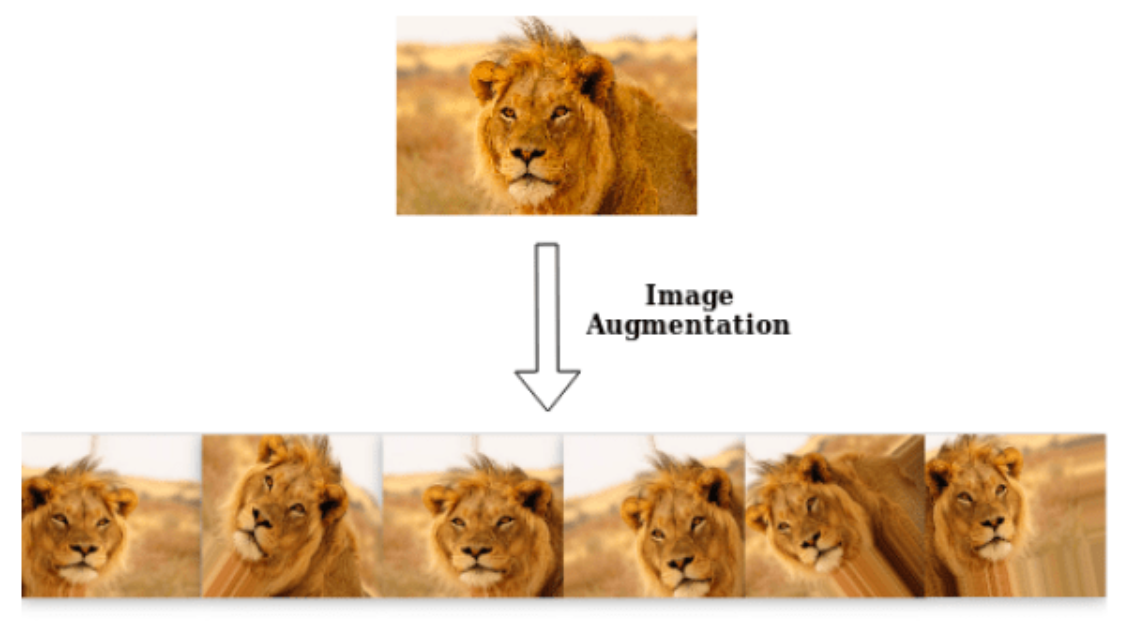

Image ref -> https://towardsdatascience.com/machinex-image-data-augmentation-using-keras-b459ef87cd22


In [8]:
# Data Augmentation.
display(Image(image_path + 'Data Augmentation.PNG', width=600, unconfined=True))
print('Image ref -> https://towardsdatascience.com/machinex-image-data-augmentation-using-keras-b459ef87cd22')

### 1.2.1.4 - Replacement of the fully connnected layers with convolutional ones:

This is where the dense layers (fully-connected layers) at the final stages of the model are replaced with convolutional ones. In more detail, the 1st set of convolutions uses larger kernels such as 7x7 and 3x3 kernels to reduce the spatial size of the incoming feature maps to 1x1 (unpadded) and this also increases the depth to 4,096. The previous output layer now uses a 1x1 convolution up to the same number of classes (like N=1,000 of 1x1 convolution for 1,000 classes) resulting in a 1x1xN vector that is normaliised by the softmax function, and then flattend into the final class output predictions. 

Implementing these kinds of layers is called __Fully Convolutional Network (FCN)__

## 1.2.2 - TF and Keras Implementation:

#### For Tensorflow implementation:

There is a repository that is maintained by the TensorFlow contributors and it consists of several curated experimental models. It is also highly advisable to check out the github reposiotry: https://github.com/tensorflow/models

For VGG model, the link is: https://github.com/tensorflow/models/blob/master/research/slim/nets/vgg.py 

#### For Keras API implementation:

The Keras API also offers its own implementations and these can be found in: https://www.tensorflow.org/api_docs/python/tf/keras/applications. Like the official TensorFlow repository, it also maintains most of the models and provides pre-trained parameters. 

__NOTE__: The following shows how to instantiate a VGG network with the Keras API (applications). It loads in the set of persisted parameters that was obtained from the complete training on ImageNet. The instantiated model is therefore able to classify images of the 1,000 classes. This saves a lot of time that would otherwise be used for re-training the model again. However, setting the "weights = None" will essentially reset the model and Keras will initialise it with random weights. If the following parameter is set to "include_top = False", the VGG dense (final fully connected layers) will be excluded and the last layer will output the feature maps. 

In [9]:
# Instantiate a VGG network:
vgg_net = tf.keras.applications.VGG16(include_top = True,
                                      weights = 'imagenet',
                                      input_tensor = None,
                                      input_shape = None, 
                                      pooling = None,
                                      classes = 1000)

## 1.3 - GoogLeNet and Inception Module/Architecture:

As the name suggests, this model was created by Google and it also introduced the concept of __Inception Blocks__. GoogLeNet can also be called Inception Network. Unlike earlier models that was introduced, GoogLeNet's creators took a different approach to creating this model, where firstly, they considered optimising the CNN computational footprint of their model. This resulted in 12 times reduction in terms of computation complextity than AlexNet and 21 times reduction than VGG-16. This dramatically reduces the training time required for GoogLeNet. Secondly, the creators also focused on making the model both deeper and (more importantly) larger, this meant that the introduction of multiscale processing with blocks of parallel layers. These considerations ultimately resulted in __Inception Modules__, where it is composed of several different layers that are working in parallel.

#### The following shows the diagram for the overall GoogLeNet Architecture:

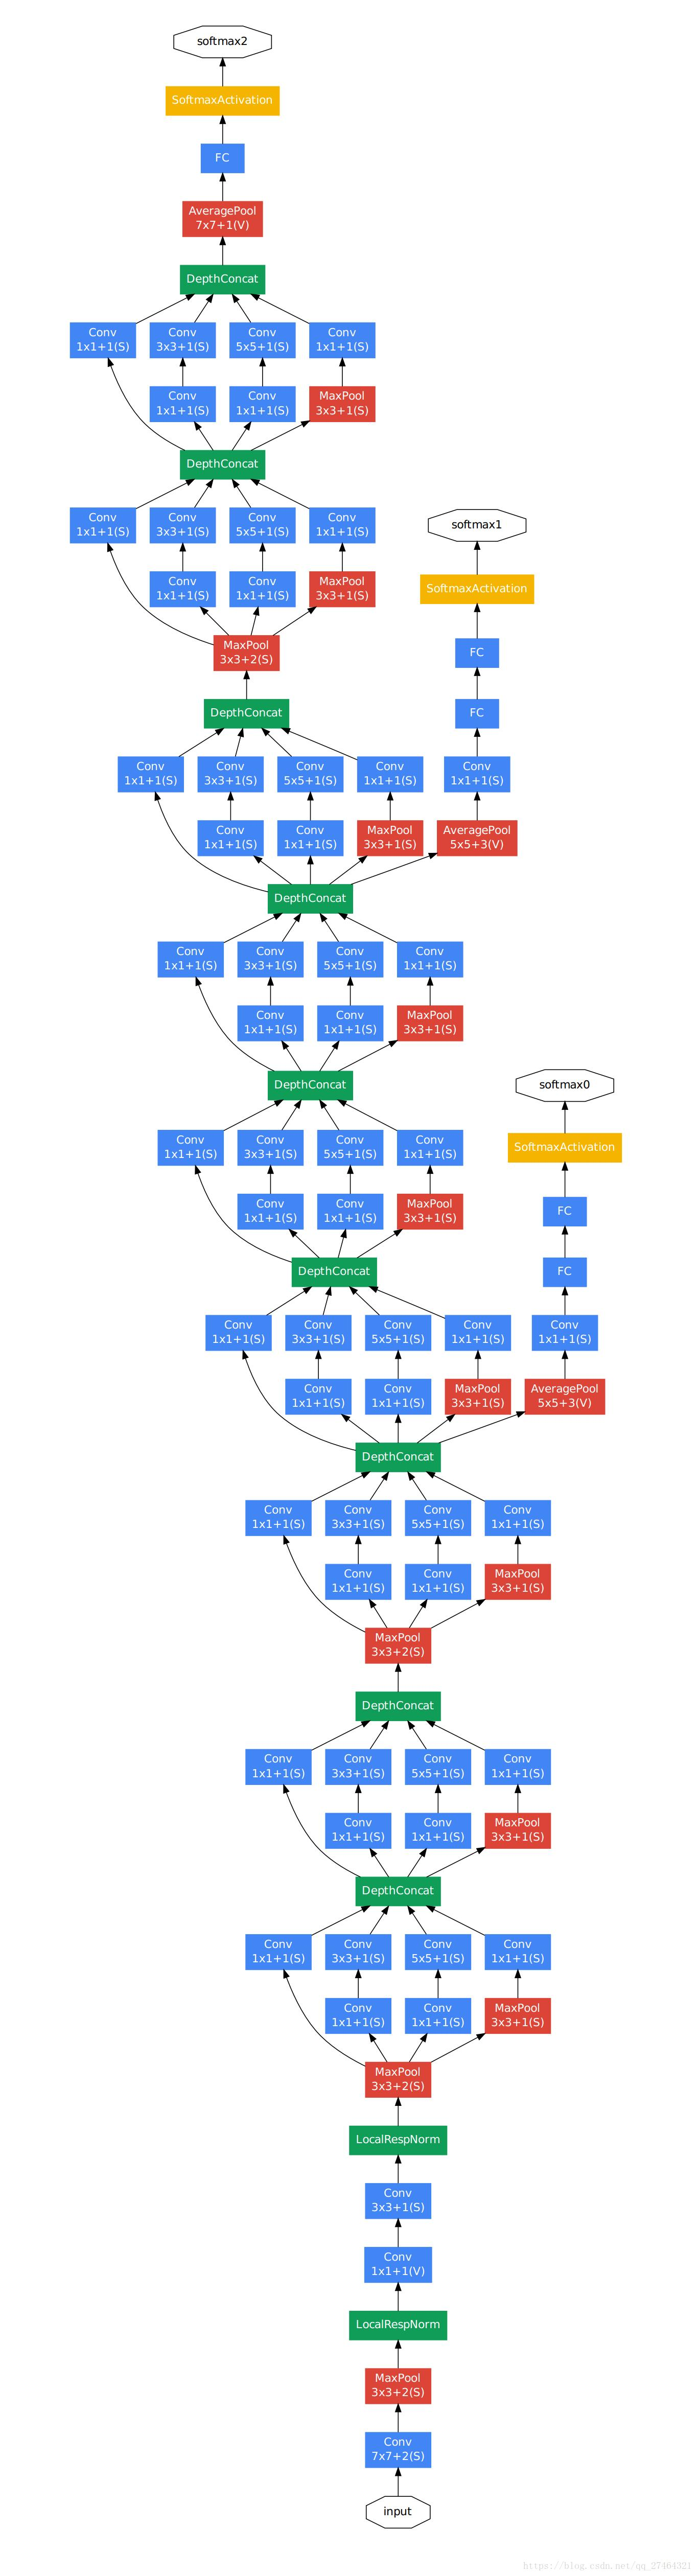

Image ref -> http://www.programmersought.com/article/98042053945/


In [10]:
# GoogLeNet Architecture: 
display(Image(image_path + 'GoogLeNet.PNG', width=800, unconfined=True))
print('Image ref -> http://www.programmersought.com/article/98042053945/')

As it can be seen, begining at the Input, the images will be passing through a series of convolutions and max-pooling layers, then the process flow meets a stack of 9 Inception Modules (a.k.a subnetworks). These blocks of layers can be seen to be stacked both vertically and horizontally. This __Inception Module__ can be seen in more detail below.

#### The following shows the Inception Module:

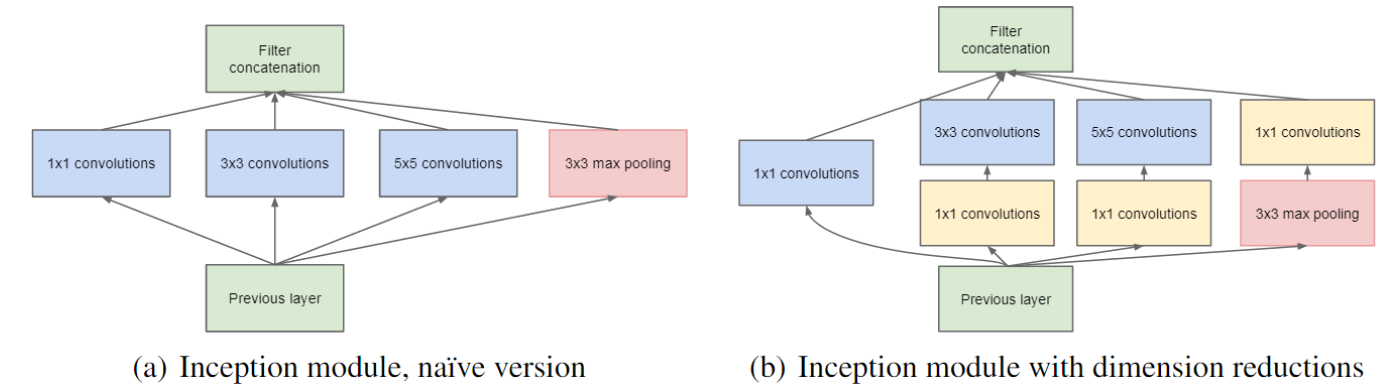

Image ref -> https://www.kdnuggets.com/2017/08/intuitive-guide-deep-network-architectures.html/2


In [11]:
# Inception Module: 
display(Image(image_path + 'Inception Module.PNG', width=1000, unconfined=True))
print('Image ref -> https://www.kdnuggets.com/2017/08/intuitive-guide-deep-network-architectures.html/2')

#### In more detail, taking a look at Image (b), Inception module with dimension reductions:

For each of the module, the input feature maps goes through 4 parallel subblocks that are composed of 1 or 2 different layers. These can be convolutions with different kerne sizes and max-pooling. At the end of each block, the results of these 4 parallel operations are concatenated along that depth dimension, hence producing a single feature volume.

All the convolutional and max-pooling operations will have the padding set to "SAME", the convolutions have a stride = 1 and uses a ReLU activation function.

Taking the example (a) above, the first inception module will receive a feature map of size 28x28x192 as its input, it goes through the following:
- In the first parallel subblock, that is composed of a single 1x1 convolution operation (with N = 64 and a stride of 1) will output a 28x28x64 tensor. 
- At the same time in parallel, the second submodule that is composed of two convolutions (1x1 and 3x3) will output a 28x28x128 tensor. 
- Similarly, the third submodule that is composed of two convolutions (1x1 and 5x5) will output a 28x28x32 tensor. 
- Lastly, the fourth submodule is the max-pooling, that is composed of a max-pooling and a 1x1 convolution operation will output the final 28x28x32 tensor. 
- As mentioned previously, these outputs are then concatenated together forming a 28x28x256 tensor. This tensor is then passed onto the second Inception module down the chain and so on. 

The features of the last module are then average-pooled from a 7x7x1024 tensor to a 1x1x1024 tensor, where it is then densely converted into the required prediction vectors. Note that there are also __Auxiliary branches__ that can be seen in the model, these are used for predictions.

#### The following image will show the depth-wise concatenation (Highlighted in RED) and the resulting outputs from each subblocks:

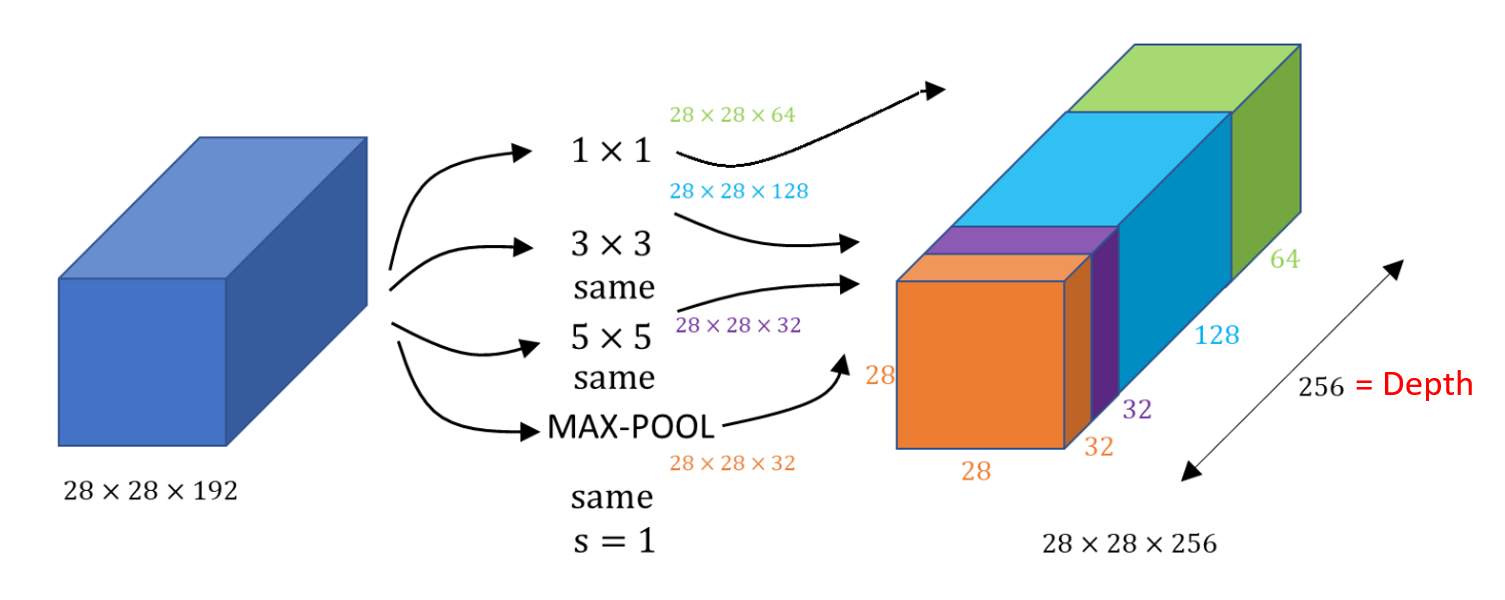

Image ref -> http://datahacker.rs/deep-learning-inception-network/


In [12]:
# Inception - Depth-wise Concatenation: 
display(Image(image_path + 'Inception Module Depth Concat.PNG', width=800, unconfined=True))
print('Image ref -> http://datahacker.rs/deep-learning-inception-network/')

## 1.3.1 - Contributions from Inception Network/GoogLeNet:

This section will go through the key concepts that differentiates Inception network apart.

List of Contributions:
1) Capturing various details. \
2) Using the 1x1 convolutions as bottlenecks. \
3) Pooling instead of using fully connecting. \
4) Addressing the Vanishing Gradient issue with intermediary losses.

### 1.3.1.1 Capturing various details:

The concept of Network in Network was fully adapted by Inception creators, as this can be seen in the model. It consits of 4 parallel layers in the inception modules where they are 1x1, 3x3 and 5x5 convolutions and coupled with the max-pooling layer (with stride = 1). This type of arrangement allows for multiscale processing of the input data, meaning that each inception module combines the features of different scales thefore it captures a wider range of information/features. The nework does not require manual selection of kernel sizes (time-consuming iterative process) as it will learn which convolutions to rely on more by itself. It improves the overall performance when vertically and horizontally stacking the layers with non-linear activation. Feature concatenation further adds non-linearity to the networks as well. All these implementations allows the model to capture various details from the data with great performance. 

### 1.3.1.2 Using the 1x1 convolutions as bottlenecks:

Replacing fully connected layers with convolutional operations like the use of 1x1 convolutional layers (stride = 1) can change the depth of the input data/feature volumes but without affecting the spatial structures. With this kind of layers, the input shape is H x W x D leading to an output shape of H x W x N tensor, meaining the that D channel values are interpolated by this layer forming into N channel values. Utilising this property, it can reduce the parameters for convolutions by compressing the features' depth and essentially acts as __bottlenecks__. 

For example, a 5x5 convolution operation (without the 1x1 convolution bottleneck) in the 1st inception module where it takes in an input shape of 28x28x192 tensor, the tensor and its filters thus contains the dimension 5x5x192x32, leading to 153,600 parameters to be perform just for this convolution. Now, with the addition of the 1x1 convolution bottleneck (as seen in the diagram previously) before the 5x5 convolution operation, the parameters are reduced like so, 1x1x192x16 + 5x5x16x32, equating to just 15,872 parameters. This is a dramatic 10 times reduction of trainable values for the kernels.

### 1.3.1.3 Pooling instead of using fully connecting:

This is another method implemented to reduce the number of parameters to be computed by the network. It utilises average-pooling layers rather than fully connected ones right after the last convolutional block. It presents with a 7x7 window size and a stride of 1. It will reduce the feature volumne from 7x7x1024 to 1x1x1024 (= 51,380,224 parameters). It should be mentioned that the network does lose some of its expressiveness for the reduction in computational complexity. The last layer of the network is a fully connected network that is used to output the predictioons, here the parameters are 1024x1000 = 1,024,000. 

### 1.3.1.4 Addressing the Vanishing Gradient issue with intermediary losses:

From the overall architecture diagram above, it can be seen that there were two auxiliary branches that can be used for predictions. These branches are present during training but then is removed after. Their purpose was to help improve the backpropagation of the loss through the network during training, which solves the __vanishing gradient__ problem of very deep networks. The Vanishing gradient problem is where due to the larger increase in the number of layers, the derivatives becomes smaller and smaller during backpropagattion, and it will eventually shrink to zero. This essentially also means that the layers won't be able to learn anything as the gradients becomes too small to update the weights. 

Note: There is also the opposite phenomenon called the __Exploding Gradient__. This can also happen in deeper networks and the gradients are so large that it makes the training process unstable.

The effective solution as mentioned involves reducing the distance between the first layers and predictions through architectural changes, by adding additional classification losses at various points of the network depths. When the final losses not able to flow properly back to the first layers, the training is still in effect because of the intermediary losses from the auxiliary branches' predictions. This also helps to improve the robustness of the layers that are affected by multiple losses as it has to learn to extract discriminative features from both the main network and auxiliary branches. 

## 1.3.2 - TF and Keras Implementations:

As the Inception model does differ from other networks, where it has multiple parallel layers and branches, the typical sequential implementations can't be used here. 

#### For Keras Functional API:

This section will show the Inception module implemented with the Keras Functional API. This method of implementation is closer to the TF styple, where the Python variables for the layers are passed as parameters to the next variable to build a graph. 

For more information: http://faroit.com/keras-docs/1.0.1/getting-started/sequential-model-guide/ or https://keras.io/guides/sequential_model/.

The following shows the simplistic model:

In [13]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input

Using TensorFlow backend.


In [14]:
# This sets jupyter to skip the code block.
run_cell = 1

In [15]:
if (run_cell == 0):
    
    # Sequential Style:
    model = Sequential()
    model.add(Conv2D(filters = 32, 
                     kernel_size = (5, 5),
                     input_shape = input_shape)
             )
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units = 10, 
                    activation= 'softmax'))

    # Functional Style:
    inputs = Input(shape= input_shape)
    conv1 = Conv2D(filters = 32, 
                   kernel_size = (5, 5)
                  )(inputs)
    maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    predictions = Dense(units = 10, 
                        activation= 'softmax')(Flatten()(maxpool1))
    model - Model(inputs = inputs,
                  outputs = predictions)

With the use of the __Functional API__, a layer can be passed to multiple others where it can be used to implement parallel blocks of the inception modules. The resulting outputs can be concatenated together in the concatenate layer.

The following will show the implementation of the Inception Block:

In [16]:
from keras.layers import Conv2D, MaxPooling2D, concatenate

In [17]:
def naive_inception_block(previous_layer, filters=[64, 128, 32]):
    conv1x1 = Conv2D(filters = filters[0], 
                     kernel_size = (1, 1), 
                     padding = 'same',
                     activation = 'relu')(previous_layer)
    
    conv3x3 = Conv2D(filters = filters[1], 
                     kernel_size = (3, 3), 
                     padding = 'same',
                     activation = 'relu')(previous_layer)
    
    conv5x5 = Conv2D(filters = filters[2], 
                     kernel_size = (5, 5), 
                     padding = 'same',
                     activation = 'relu')(previous_layer)
    
    max_pool = MaxPooling2D(pool_size = (3, 3), 
                            strides = (1, 1), 
                            padding = 'same')(previous_layer)
    
    return concatenate([conv1x1, conv3x3, conv5x5, max_pool], axis=-1)

In [18]:
def inception_block_bottleneck(previous_layer, filters=[64, 128, 32]):
    conv1x1 = Conv2D(filters = filters[0], 
                     kernel_size = (1, 1), 
                     padding = 'same',
                     activation = 'relu')(previous_layer)
    
    conv1x1_p1 = Conv2D(filters = filters[0], 
                     kernel_size = (1, 1), 
                     padding = 'same',
                     activation = 'relu')(previous_layer)
    
    conv3x3_1x1 = Conv2D(filters = filters[1], 
                     kernel_size = (3, 3), 
                     padding = 'same',
                     activation = 'relu')(conv1x1_p1)
    
    conv1x1_p2 = Conv2D(filters = filters[0], 
                     kernel_size = (1, 1), 
                     padding = 'same',
                     activation = 'relu')(previous_layer)
    
    conv5x5_1x1 = Conv2D(filters = filters[2], 
                     kernel_size = (5, 5), 
                     padding = 'same',
                     activation = 'relu')(conv1x1_p2)
    
    max_pool_1x1 = MaxPooling2D(pool_size = (3, 3), 
                            strides = (1, 1), 
                            padding = 'same')(previous_layer)
    
    conv1x1_p3 = Conv2D(filters = filters[0], 
                     kernel_size = (1, 1), 
                     padding = 'same',
                     activation = 'relu')(max_pool_1x1)
    
    return concatenate([conv1x1, conv3x3_1x1, conv5x5_1x1, conv1x1_p3], axis=-1)

#### For Tensorflow model and TensorFlow Hub:

Usage and tutorials from Google's Inception model can be found: https://github.com/tensorflow/models/tree/master/research/inception

This section will cover the repository that is __TensorFlow-Hub__, where it consists of several pretrained models. It provides the convenience of having no need to spend time implementing models and training them from scratch. It mainly combines the website, "https://tfhub.dev", for searchable specific models and a Python Package for downloading these models for usage. 

##### The following shows how to use TensorFlow-Hub to obtain and set up __Inception V3__:

URL for the model search: https://tfhub.dev/s?subtype=module,placeholder

In [19]:
import tensorflow as tf
import tensorflow_hub as hub

In [20]:
nb_classes = 10

In [21]:
# Get the URL for inception: by searching with the link above.
url = "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4"

# Instantiate the TF-Hub as a Layer: 
hub_feature_extractor = hub.KerasLayer(handle = url,                # URl for the model.
                                       trainable = False,           # Flag to set the layers to be trainable or not.
                                       input_shape = (299, 299, 3), # Expected input shape (this can be found on the tfhub.dev webpage).
                                       output_shape = (2048, ),     # Expected output shape (this can be found on the tfhub.dev webpage).
                                       dtype = tf.float32           # Expected data type.
                                      )

# Instantiate the Inception Model:
inception_model = tf.keras.Sequential(
    [hub_feature_extractor, tf.keras.layers.Dense(units = nb_classes, activation = 'softmax')], 
    name = "inception_tf_hub"
)

inception_model.build([None, 299, 299, 3])  # Batch input shape.

Things to note:
- The first step is to find a model to use from the tfhub.dev webpage.
- Copy the URL and save it as a variable (as seen on top)
- As seen on the webpage, the input shape of the image vector is expected to be (299 x 299 x 3), along with other parameters.
- As this model is set as __feature extractor__, this means that the network returns extracted features from the last convolutional block just before the dense layers.
- As the a feature extractor, the final layers such as the dense layers are expected to be set up manually by the users.
- It should also be mentioned that TensorFlow-Hub can interface well with Keras too. 

#### For Keras Model:

Similar to Section 1.2.2 for VGG, the Inception V3 model can be set up with the Keras API as well, where the pretrained weights on ImageNet can be utilised.

In [22]:
# Instantiate a Inception V3 network:
inceptionV3_net = tf.keras.applications.InceptionV3(include_top = True, 
                                                     weights = 'imagenet', 
                                                     input_tensor = None, 
                                                     input_shape = None, 
                                                     pooling = None, 
                                                     classes = 1000
                                                    )

## 1.4 - ResNet Architecture:

Another more efficient approach of creating networks that are very deep can be introduced with the __Residual Module__ that is part of the ResNet Architecture. Thiis model was developed by Microsoft. One of the challenges, as mentioned earlier, with deep networks is the vanishing or exploding gradient problem, where the training process becomes harder as the number of layers increases. Another challenge is that deeper networks also have a degrading performance hit. This is where the accuracy of the network no longer linearly increases with the addition of new layers to its architecture. The training loss can also be seen to decrease, provided that there is no overfitting.

ResNet won the ILSVRC of 2015 employing tchniques such as model averaging and prediction averaging, which aided the model to achieve a historically low 3.6% top-5 error rate. It was also the first time the model was able to beat humans on the given dataset.

Similar to the Inception Network, the ResNet model have gone through several iterative architectural improvements. For example, the model added bottleneck convolutions and smaller kernels. ResNet also have several versions that coincides with the number of layers, such as ResNet-18, ResNet-50, ResNet-101, ResNet-152 and so on.

#### The following shows the ResNet architecture:

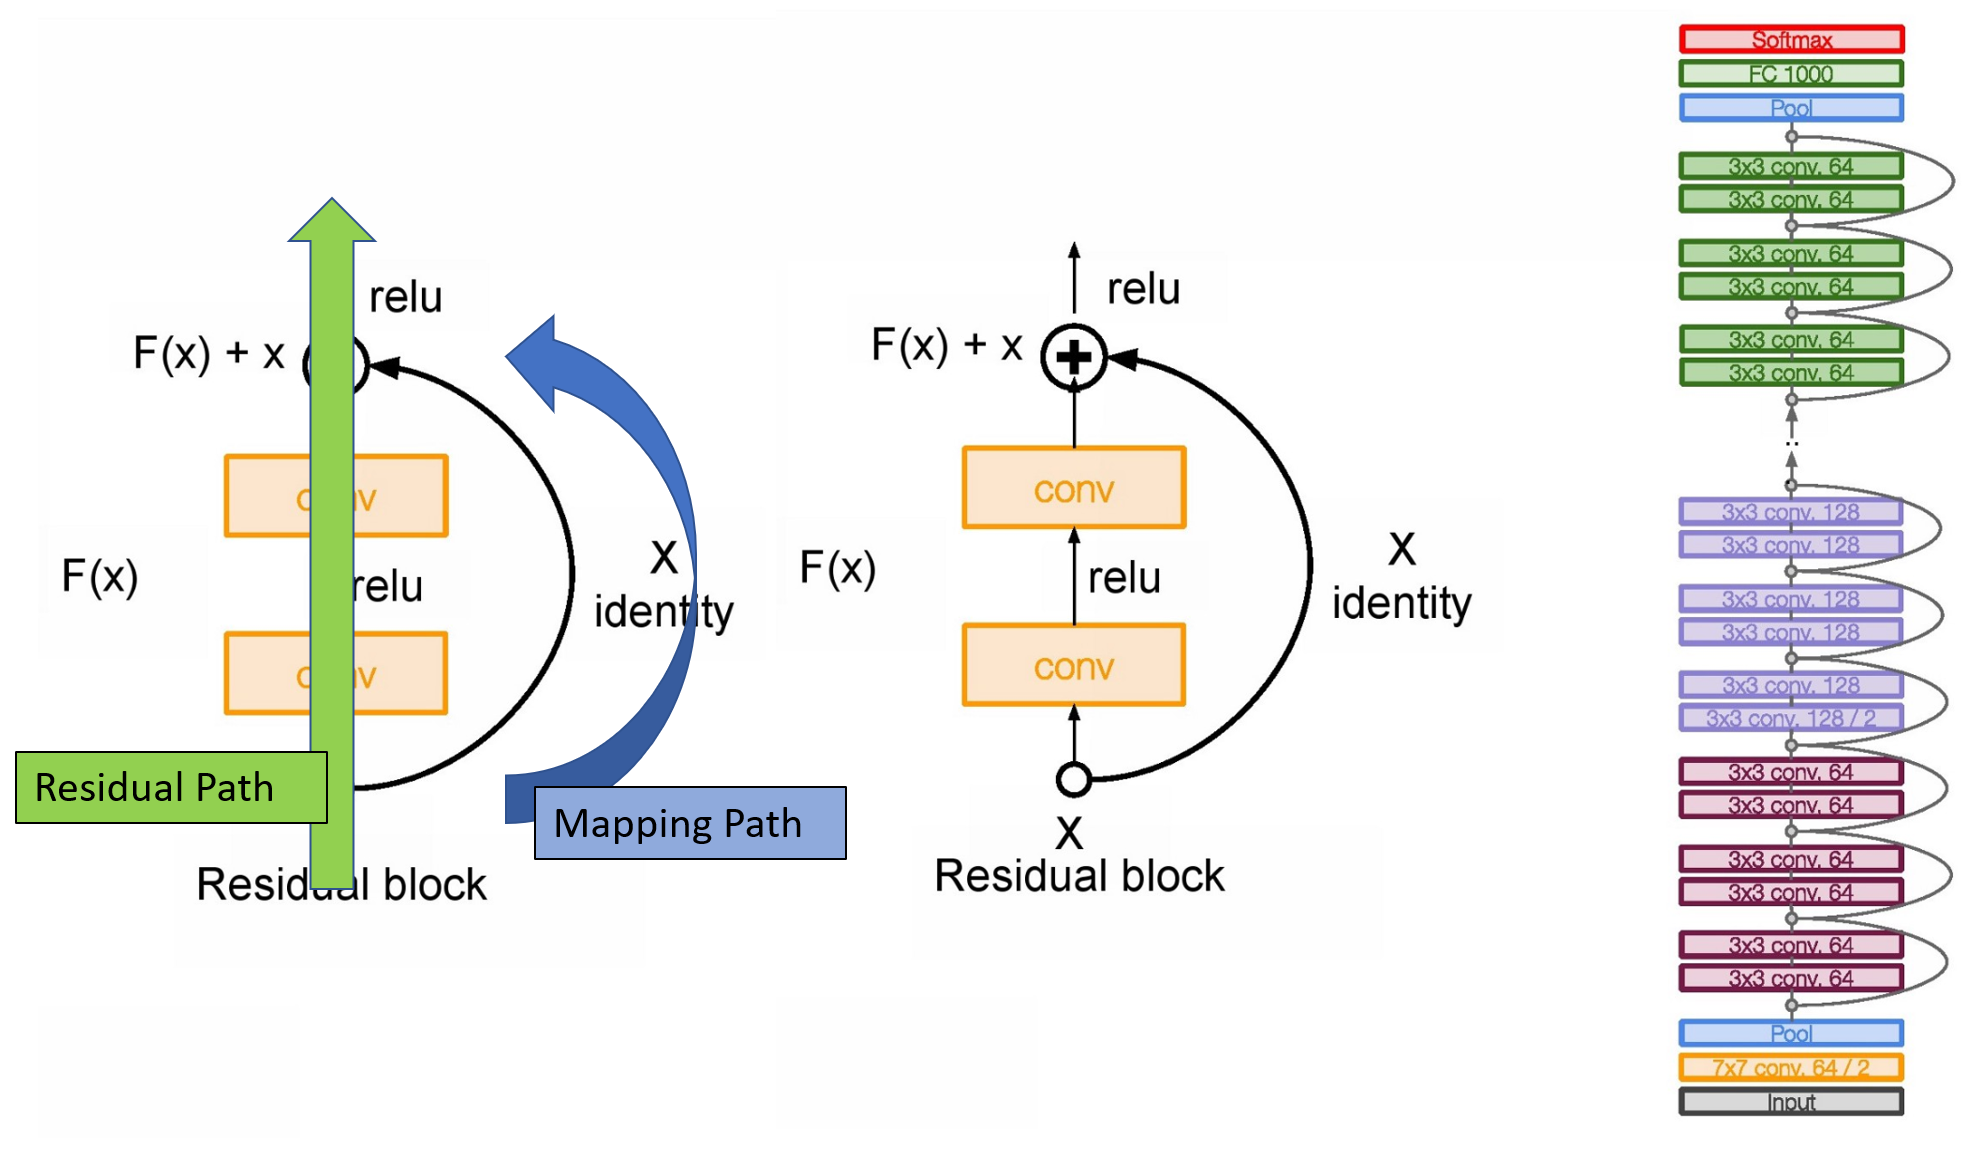

Image ref -> https://towardsdatascience.com/architecture-comparison-of-alexnet-vggnet-resnet-inception-densenet-beb8b116866d


In [23]:
# ResNet Architecture: 
display(Image(image_path + 'ResNet.PNG', width=800, unconfined=True))
print('Image ref -> https://towardsdatascience.com/architecture-comparison-of-alexnet-vggnet-resnet-inception-densenet-beb8b116866d')

From the diagram above, the architecture follows with all the convolutional operations and max-pooling layers having padding that is "SAME" with a stride = 1. Batch normalisation is then applied to both the following, after each of the 3x3 convolutions as seen by the __residual path (GREEN)__ and the 1x1 convolutions with no activation function as seen by the __mapping path (BLUE)__.

ResNet blocks are composed of one non-linear path (residual path) and an identity path (mapping path), where this differs from the Inception model which consists of layer blocks with parallel operations (processing the input information). From the diagram above, the __residual block__ on the residual path applies two convolutions with batch normalisation then followed by ReLU activation on the input feature maps. It also have an identity path which only forwards the features without applying any transformations.

It is also notable that sometimes, when the depth is increased in parallel by non-linear branches, a 1x1 convolutions are applied to the network on the Mapping path after a couple of residual blocks to help the model adap to the depth of the features. This avoids the increase in the number of parameters. Further, the spatial dimensionality can also be reduced by using striide = 2 on both side.

Similar to Inception modules, the feature maps from each of the branch are merged together before moving onto the following residual block. The operation here is not a depth-wise concatenation (like Inception) but it is done through element-wise addition. This also means that there is no increase in parameters which is an added advantage of the model. As it can be in the diagram, it uses a non-linear function ( $F(x) + x $ ) to merge. Lastly, the output features of the last block are tthen average-pooled and densely converted into predictions.

## 1.4.1 - Contributions from ResNet:

List of contributions:
1) Estimating a Residual function rather than mapping. \
2) Going from very deep to ultra deep.

### 1.4.1.1 - Estimating a Residual function rather than mapping:

Tackling the degradation phenomenon with identity mapping would not happen, where if the set of layers would learn the weights in order that the series of operations can finally return the same tensors as the input layers. The creators of ResNet pointed out that the addtion of some layers on top of CNN layers should bring about at least the same training or validation errors if the layers were to converge to the identity function. It was however observed to not be the case. This meant that CNN layers are not able to the identity mapping easily. This then lead to the introduction of residual blocks that is composed of two paths:

1) The path for further processing of the data with the addition of convolutional layers. \
2) Another path that performs the identity mapping.

The addtion of the residual block on top of the CNN layers means that its original performance can be preserved by setting the weightts of the processing branch to zero, therefore leaving only the predefined identity mapping. The processing path would only be considered when it is beneficial towards loss minimisation.

This data forwarding path is typically mentioned as the __Skip or Shortcut__. The processing path is then called the __Residual Path__. It is called residual because, the output of its operations are added to the orignal input, consisting of the magnitude of the processed tensor that is much smaller than the input tensor, when the identity mapping is close to the optimal. Overall, this path introduces small changes to the input data hence allowing the patterns/features to be propagated through to deeper layers.


### 1.4.1.2 - Going from very deep to ultra deep:

As mentioned before, these residual blocks does not add any additional parameters for computation as the __Skip__ does not increase the number of parameters. This meant that utilising these residual blocks allows for an Ultra Deep Network to be constructed. For example, ResNet can be scaled from 152 layers to an impressive 1,202 layer one. 

In more recent works, researchers are trying to better improve this architecture with more efficient and deeper networks, such as the Highway networks or DenseNet models.

## 1.4.2 TF and Keras Implementations:\

This section will show how to implement the architecture of ResNet in different APIs.

### For Residual Blocks with Keras Functional API:

As seen in the diagram above, firstly, the __Residual Path__ consists of 2 convolutional layers, that is followed by batch normalisation. The ReLU activation function is then applied after the first convolution. Secondly, the ReLU function is only applied after merging with the identity (mapping path) path. 

The __ShortcutPath__ is easier to implement as it contains either no layers or a single 1x1 convolution, where it is to reshape the input tensor when the residual path is altering its dimentsions (like when a different stride is used).

Lastly, the results of the __two__ paths are added together then proceeds with a ReLu function to be appliied to the sum. 

##### The following shows the implementation:

In [26]:
from tensorflow.keras.layers import Activation, Conv2D, BatchNormalization, add

In [28]:
# Residual Block:
def residual_block_basic(x, filters, kernel_size=3, strides=1):
    # Residual Path:
    # Convolution block 1
    conv_1 = Conv2D(filters = filters, 
                    kernel_size = kernel_size, 
                    strides=strides, 
                    padding='same')(x)
    
    bn_1 = BatchNormalization(axis=-1)(conv_1)
    act_1 = Activation('relu')(bn_1)
    
    # Convolution block 2
    conv_2 = Conv2D(filters = filters, 
                    kernel_size = kernel_size, 
                    strides=strides, 
                    padding='same')(act_1)
    
    residual = BatchNormalization(axis=-1)(conv_2)
    
    # Shortcut Path:
    shortcut = x if strides == 1 else Conv2D(filters = filters, 
                                             kernel_size = 1, 
                                             strides=strides, 
                                             padding='valid')(x)
    
    # Merge and Return the output:
    return Activation('relu')(add( [shortcut, residual] ))

### For TensorFlow Model and TensorFlow Hub:

Similar to Inception, there are several implementations of ResNet in the Tensorflow models repository on Github and also pretrained ones on TensorFlow Hub.

### For Keras Model:

Same here as well, Keras also offers its own ResNet implementations (with optional pretrained weights) which can be found here:
https://keras.io/api/applications/resnet/#resnet50-function

## Summary:

Although this is not the end of this project, it does conclude the 1st notebook relevant to the theory of these advanced deep learning models. Please go to check out __Notebook 2__ for the __implementation of ResNet from scratch__.